In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
%matplotlib inline

In [99]:
data = pd.read_csv("ca_tfidf_zip.csv")
data.drop(data.columns[:3], axis=1, inplace=True)

In [105]:
data.shape

(3176846, 509)

In [106]:
data[data["disp"] == 0].shape

(458639, 509)

In [107]:
(data["dist"] + data["judge"]).nunique()

448

In [108]:
data["dist"].nunique()

73

In [157]:
data_1 = data[data["disp"] == 1].sample(n=400000)
data_0 = data[data["disp"] == 0].sample(n=400000)
data_model = data_1.append(data_0)
X = data_model.drop("disp", axis=1)
y = data_model["disp"]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Save data as dictionary

In [22]:
data_dict = {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}
import pickle
pickle.dump(data_dict, open("data_model_tfidf.pickle", "wb"))

Load data

In [3]:
data_dict = pickle.load(open("data_model_tfidf.pickle", "rb"))
X_train = data_dict["X_train"]; X_test = data_dict["X_test"]; y_train = data_dict["y_train"]; y_test = data_dict["y_test"]

In [4]:
X_train = X_train.reset_index().drop("index", axis=1)
X_train.drop(["judge", "close_date", "dist"], axis=1, inplace=True)
y_train = y_train.reset_index()["disp"]

In [5]:
X_test = X_test.reset_index().drop("index", axis=1)
y_test = y_test.reset_index()["disp"]
info = X_test[["judge", "close_date", "dist"]]
info["judge_dist"] = info["judge"] + " " + info["dist"]
X_test.drop(["judge", "close_date", "dist"], axis=1, inplace=True)

/home/yn811/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
def standardize(X_train, X_test):
    mean = X_train.mean()
    std = X_train.std()
    constant_cols = X_train.columns[std == 0]
    X_train.drop(constant_cols, axis=1, inplace=True)
    X_test.drop(constant_cols, axis=1, inplace=True)
    mean = mean[std > 0]
    std = std[std > 0]
    X_train = X_train - mean; X_train = X_train / std
    X_test = X_test - mean; X_test = X_test / std
    return X_train, X_test

In [7]:
X_train, X_test = standardize(X_train, X_test)

In [ ]:
# y_train = (y_train * 2) - 1
# y_test = (y_test * 2) - 1
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("Model accuracy: {}".format(model.score(X_test, y_test)))
print("Percentage of prdicted discharge: {}".format(y_pred.sum()/len(y_pred)))
print("Precision and Recall: {}".format(precision_recall_fscore_support(y_test, y_pred)))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_prob)))

In [7]:
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("Model accuracy: {}".format(model.score(X_test, y_test)))
print("Percentage of prdicted discharge: {}".format(y_pred.sum()/len(y_pred)))
print("Precision and Recall: {}".format(precision_recall_fscore_support(y_test, y_pred)))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_prob)))

Model accuracy: 0.6464924242424243
Percentage of prdicted discharge: 0.4941515151515152
Precision and Recall: (array([0.64378782, 0.64926105]), array([0.65265315, 0.64035685]), array([0.64819017, 0.64477821]), array([65865, 66135]))
ROC AUC: 0.7077466111528898


In [8]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("Model accuracy: {}".format(model.score(X_test, y_test)))
print("Percentage of prdicted discharge: {}".format(y_pred.sum()/len(y_pred)))
print("Precision and Recall: {}".format(precision_recall_fscore_support(y_test, y_pred)))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_prob)))

Model accuracy: 0.6676515151515151
Percentage of prdicted discharge: 0.47521969696969696
Precision and Recall: (array([0.65876052, 0.67746975]), array([0.69282624, 0.64257957]), array([0.67536408, 0.65956357]), array([65865, 66135]))
ROC AUC: 0.7289655349855085


In [10]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("Model accuracy: {}".format(model.score(X_test, y_test)))
print("Percentage of prdicted discharge: {}".format(y_pred.sum()/len(y_pred)))
print("Precision and Recall: {}".format(precision_recall_fscore_support(y_test, y_pred)))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_prob)))

Model accuracy: 0.6514545454545455
Percentage of prdicted discharge: 0.5490075757575757
Precision and Recall: (array([0.66677865, 0.63886627]), array([0.60265695, 0.70005292]), array([0.63309834, 0.66806153]), array([65865, 66135]))
ROC AUC: 0.7173340204115065


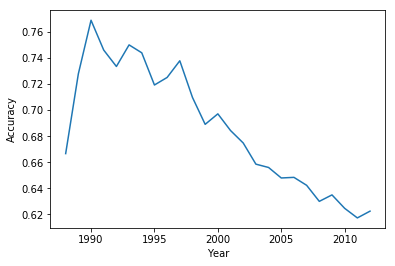

In [11]:
years = info.groupby("close_date").count()
years = np.array(sorted(years.index[years["judge"] > 100]))
years = years[years > 0]
acc = []
for year in years:
    index = (info["close_date"] == year)
    x = X_test[index]
    y = y_test[index]
    acc.append(model.score(x, y))
plt.plot(years, acc)
plt.xlabel("Year")
plt.ylabel("Accuracy")
plt.savefig("year-vs-acc")

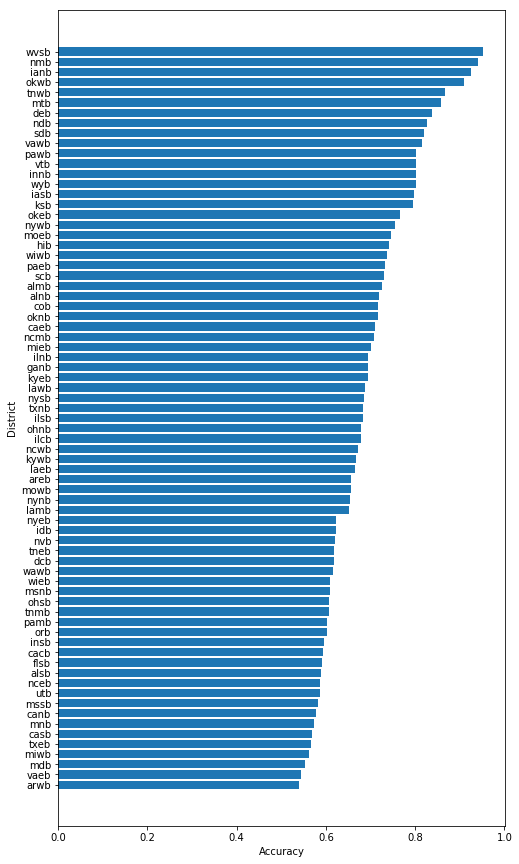

In [16]:
dists = info.groupby("dist").count()
dists = dists.index[dists["judge"] > 100]
acc = []
for dist in dists:
    index = (info["dist"] == dist)
    x = X_test[index]
    y = y_test[index]
    acc.append(model.score(x, y))
dist_acc = pd.DataFrame(list(zip(dists, acc)), columns=["dist", "accuracy"])
dist_acc = dist_acc.sort_values(by="accuracy")
plt.figure(figsize=(8, 15))
plt.barh(dist_acc["dist"], dist_acc["accuracy"])
plt.ylabel("District")
#plt.xticks(rotation=90)
plt.xlabel("Accuracy")
plt.savefig("district-vs-acc")

In [9]:
judges_count = info.groupby("judge_dist").count()
judges = judges_count.index
acc = []
for judge in judges:
    index = (info["judge_dist"] == judge)
    x = X_test[index]
    y = y_test[index]
    acc.append(model.score(x, y))
# plt.plot(acc)

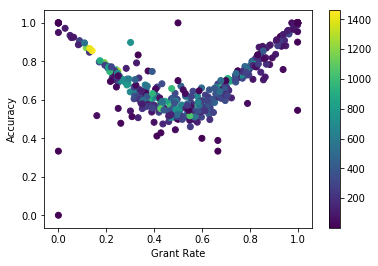

In [10]:
grant_rate = []; num_decisions = []
for judge in judges:
    grant_rate.append(y_test[info["judge_dist"] == judge].sum() / y_test[info["judge_dist"] == judge].count())
    num_decisions.append(y_test[info["judge_dist"] == judge].count())
plt.scatter(grant_rate, acc, c=np.array(num_decisions))
plt.xlabel("Grant Rate")
plt.ylabel("Accuracy")
plt.colorbar()
plt.savefig("grant-rate-vs-accuracy")

In [17]:
ftr_importance = pd.DataFrame(list(zip(X_test.columns, model.feature_importances_)), columns=["feature", "importance"])
ftr_importance.sort_values(by="importance", ascending=False).head(35)

,feature,importance
455,population,0.120312
459,EST,0.116430
458,AP,0.108310
457,QP1,0.108291
456,EMP,0.107869
242,that,0.015759
265,is,0.013036
349,debtor,0.011735
352,an,0.011454
285,for,0.011428


W/O resampling

In [ ]:
data_model

In [154]:
data_model = data.sample(n=800000)
X = data_model.drop("disp", axis=1)
y = data_model["disp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = X_train.reset_index().drop("index", axis=1)
X_train.drop(["judge", "close_date", "dist"], axis=1, inplace=True)
y_train = y_train.reset_index()["disp"]
X_test = X_test.reset_index().drop("index", axis=1)
y_test = y_test.reset_index()["disp"]
info = X_test[["judge", "close_date", "dist"]]
info["judge_dist"] = info["judge"] + " " + info["dist"]
X_test.drop(["judge", "close_date", "dist"], axis=1, inplace=True)
X_train, X_test = standardize(X_train, X_test)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("Model accuracy: {}".format(model.score(X_test, y_test)))
print("Percentage of prdicted discharge: {}".format(y_pred.sum()/len(y_pred)))
print("Precision and Recall: {}".format(precision_recall_fscore_support(y_test, y_pred)))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_prob)))

/home/yn811/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Model accuracy: 0.8518825757575758
Percentage of prdicted discharge: 0.9500492424242424
Precision and Recall: (array([0.47099416, 0.87190855]), array([0.16200636, 0.96908651]), array([0.24108685, 0.91793274]), array([ 38338, 225662]))
ROC AUC: 0.7221753358359002


In [13]:
avg_time = pd.read_csv("case_avg_time.csv", index_col=0)
avg_time["judge_dist"] = avg_time["judge"] + " " + avg_time["district"]

In [28]:
judge_time = dict(zip(avg_time["judge_dist"].apply(lambda x: x.lower()), avg_time["mean_time"]))

In [29]:
decision_time = []
for judge in judges:
    try:
        decision_time.append(judge_time[judge])
    except:
        continue

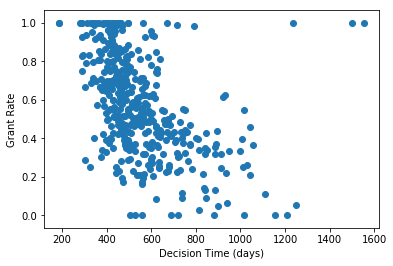

In [41]:
plt.scatter(decision_time, grant_rate)
plt.xlabel("Decision Time (days)")
plt.ylabel("Grant Rate")
plt.savefig("time-vs-grant-rate")

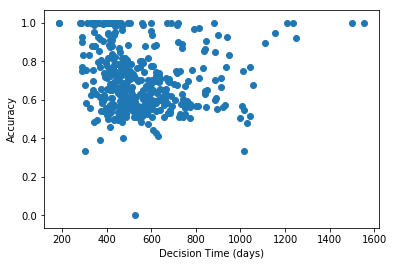

In [42]:
plt.scatter(decision_time, acc)
plt.xlabel("Decision Time (days)")
plt.ylabel("Accuracy")
plt.savefig("time-vs-acc")